In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('E:\\ml_revision\\feature_construction_splliting\\datasets\\titanic.csv')

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Featue Construction

In the dataset there are columns named as SibSp (sibling and spouse), Parch (Parents and child)

We can use this features to construct new feature named family size

In [10]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [11]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [12]:
df['family_size'] = 1 + df['SibSp'] + df['Parch']

In [14]:
print(df['family_size'].unique())
df['family_size'].value_counts()

[ 2  1  5  3  7  6  4  8 11]


family_size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

We will construct the new feature which categorized the families into the types called 'small', 'medium', 'large' depending on the number of members present it it.

In [15]:
df['family_type'] = np.where(
    df['family_size'] <= 4, 
    'small', 
    np.where(
        df['family_size'] <= 6,
        'medium',
        'large'
    )
)

In [17]:
df['family_type'].value_counts()

family_type
small     829
medium     37
large      25
Name: count, dtype: int64

Thus we have created two featues whichare family_size and family_type.

We can drop the previous columns/features depending upon the requirements and performance.

In [21]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1,small
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C,1,small
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S,3,small


## Feature Splitting

We are going to split the feature 'Name' into the two viz. 'salutation' and 'name'

In [22]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [40]:
df['salutation'] = df['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
df['Name'] = df['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[1]

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type,salutation
0,1,0,3,Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,small,Mr
1,2,1,1,John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,2,small,Mrs
2,3,1,3,Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,small,Miss
3,4,1,1,Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,2,small,Mrs
4,5,0,3,William Henry,male,35.0,0,0,373450,8.0500,NaN,S,1,small,Mr


<Axes: xlabel='salutation'>

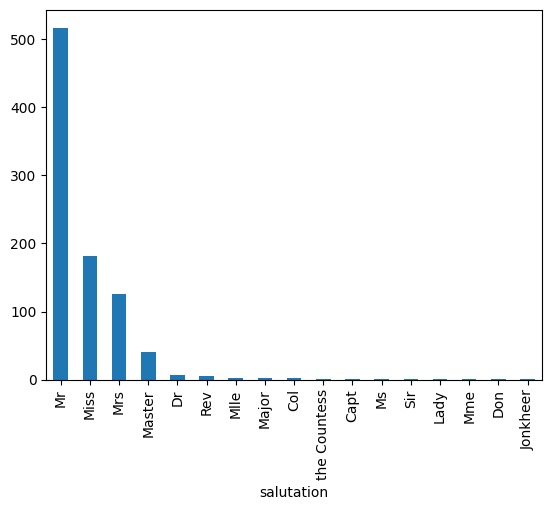

In [42]:
df['salutation'].value_counts().plot(kind='bar')

### So we can get more information like % of 'Mrs' who survived and % of 'Mr' who survived

% of Mrs who survived is greater as the females and children are rescued first in rescue operations.

In [48]:
total_mrs = df[df['salutation'] == 'Mrs'].shape[0]

mrs_survived = df[(df['salutation'] == 'Mrs') & (df['Survived'] == 1)].shape[0]

percentage_survived = (mrs_survived / total_mrs) * 100

print(f"Percentage of 'Mrs' who survived: {percentage_survived:.2f}%")

Percentage of 'Mrs' who survived: 79.20%


In [49]:
total_mr = df[df['salutation'] == 'Mr'].shape[0]

mr_survived = df[(df['salutation'] == 'Mr') & (df['Survived'] == 1)].shape[0]

percentage_survived = (mr_survived / total_mrs) * 100

print(f"Percentage of 'Mr' who survived: {percentage_survived:.2f}%")

Percentage of 'Mr' who survived: 64.80%
